In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import os
import warnings
warnings.filterwarnings('ignore')
os.environ["PYTHONWARNINGS"] = "ignore"

In [3]:
cur_folder_name = os.getcwd().split('/')[-1]
if cur_folder_name != "fairness-variance":
    os.chdir("../../..")

print('Current location: ', os.getcwd())

Current location:  /Users/denys_herasymuk/UCU/4course_2term/Bachelor_Thesis/Code/fairness-variance


# Visualizations

In [4]:
from virny.utils.custom_initializers import create_models_metrics_dct_from_database_df

from source.utils.db_functions import read_model_metric_dfs_from_db
from source.custom_classes.experiments_composer import ExperimentsComposer
from source.visualizations import preprocess_metrics, create_group_base_and_fair_models_box_plot, \
    create_scatter_plot, create_group_models_box_plot_per_test_set, create_bar_plot_for_model_selection

pip install 'aif360[LawSchoolGPA]'
pip install 'aif360[AdversarialDebiasing]'
pip install 'aif360[AdversarialDebiasing]'


## Initialize Configs

In [5]:
EXPERIMENT_NAME = 'out_of_domain_uncertainty_poor_income_test'
DB_COLLECTION_NAME = 'out_of_domain_uncertainty'
DATASET_NAME = 'Folktables_2018_Income'
EXPERIMENT_SESSION_UUID = '5da5b71c-ff1b-4d0e-9f73-cd18d2ee1ea8'
SENSITIVE_ATTRS = ['SEX', 'RAC1P', 'SEX&RAC1P']
MODEL_NAMES = ['RandomForestClassifier']

In [6]:
from source.utils.db_functions import connect_to_mongodb

client, collection_obj, db_writer_func = connect_to_mongodb(DB_COLLECTION_NAME)

## Group Metrics Composition

In [7]:
model_metric_dfs = read_model_metric_dfs_from_db(collection_obj, EXPERIMENT_SESSION_UUID)
models_metrics_dct = create_models_metrics_dct_from_database_df(model_metric_dfs)
client.close()

In [8]:
models_metrics_dct[list(models_metrics_dct.keys())[0]].shape

(38, 33)

In [9]:
models_metrics_dct[list(models_metrics_dct.keys())[0]][
    models_metrics_dct[list(models_metrics_dct.keys())[0]]['Experiment_Iteration'] == 'Exp_iter_1'
].head(20)

,Metric,Model_Name,Model_Params,Dataset_Name,Num_Estimators,Test_Set_Index,Tag,Record_Create_Date_Time,Session_Uuid,Experiment_Iteration,...,SEX&RAC1P_priv,SEX&RAC1P_priv_correct,SEX&RAC1P_priv_incorrect,SEX_dis,SEX_dis_correct,SEX_dis_incorrect,SEX_priv,SEX_priv_correct,SEX_priv_incorrect,overall
0,Accuracy,RandomForestClassifier,"{'bootstrap': False, 'ccp_alpha': 0.0, 'class_...",Folktables_2018_Income,200,0,OK,2023-10-29 08:21:16.582,5da5b71c-ff1b-4d0e-9f73-cd18d2ee1ea8,Exp_iter_1,...,0.799256,1.000000,0.000000,0.851692,1.000000,0.000000,0.768780,1.000000,0.000000,0.809200
1,Accuracy,RandomForestClassifier,"{'bootstrap': False, 'ccp_alpha': 0.0, 'class_...",Folktables_2018_Income,200,1,OK,2023-10-29 08:21:17.132,5da5b71c-ff1b-4d0e-9f73-cd18d2ee1ea8,Exp_iter_1,...,0.750288,1.000000,0.000000,0.761662,1.000000,0.000000,0.746022,1.000000,0.000000,0.753700
2,Aleatoric_Uncertainty,RandomForestClassifier,"{'bootstrap': False, 'ccp_alpha': 0.0, 'class_...",Folktables_2018_Income,200,0,OK,2023-10-29 08:21:16.582,5da5b71c-ff1b-4d0e-9f73-cd18d2ee1ea8,Exp_iter_1,...,0.583991,0.529683,0.800215,0.538175,0.492891,0.798227,0.608931,0.551572,0.799645,0.574438
3,Aleatoric_Uncertainty,RandomForestClassifier,"{'bootstrap': False, 'ccp_alpha': 0.0, 'class_...",Folktables_2018_Income,200,1,OK,2023-10-29 08:21:17.132,5da5b71c-ff1b-4d0e-9f73-cd18d2ee1ea8,Exp_iter_1,...,0.625302,0.567121,0.800113,0.601827,0.543291,0.788892,0.630441,0.571233,0.804355,0.616394
4,F1,RandomForestClassifier,"{'bootstrap': False, 'ccp_alpha': 0.0, 'class_...",Folktables_2018_Income,200,0,OK,2023-10-29 08:21:16.582,5da5b71c-ff1b-4d0e-9f73-cd18d2ee1ea8,Exp_iter_1,...,0.621920,1.000000,0.000000,0.591756,1.000000,0.000000,0.633467,1.000000,0.000000,0.618705
5,F1,RandomForestClassifier,"{'bootstrap': False, 'ccp_alpha': 0.0, 'class_...",Folktables_2018_Income,200,1,OK,2023-10-29 08:21:17.132,5da5b71c-ff1b-4d0e-9f73-cd18d2ee1ea8,Exp_iter_1,...,0.700028,1.000000,0.000000,0.653025,1.000000,0.000000,0.720915,1.000000,0.000000,0.692317
6,FNR,RandomForestClassifier,"{'bootstrap': False, 'ccp_alpha': 0.0, 'class_...",Folktables_2018_Income,200,0,OK,2023-10-29 08:21:16.582,5da5b71c-ff1b-4d0e-9f73-cd18d2ee1ea8,Exp_iter_1,...,0.483416,0.000000,1.000000,0.494208,0.000000,1.000000,0.478615,0.000000,1.000000,0.484000
7,FNR,RandomForestClassifier,"{'bootstrap': False, 'ccp_alpha': 0.0, 'class_...",Folktables_2018_Income,200,1,OK,2023-10-29 08:21:17.132,5da5b71c-ff1b-4d0e-9f73-cd18d2ee1ea8,Exp_iter_1,...,0.415509,0.000000,1.000000,0.467344,0.000000,1.000000,0.388278,0.000000,1.000000,0.422347
8,FPR,RandomForestClassifier,"{'bootstrap': False, 'ccp_alpha': 0.0, 'class_...",Folktables_2018_Income,200,0,OK,2023-10-29 08:21:16.582,5da5b71c-ff1b-4d0e-9f73-cd18d2ee1ea8,Exp_iter_1,...,0.067960,0.000000,1.000000,0.054962,0.000000,1.000000,0.077507,0.000000,1.000000,0.065143
9,FPR,RandomForestClassifier,"{'bootstrap': False, 'ccp_alpha': 0.0, 'class_...",Folktables_2018_Income,200,1,OK,2023-10-29 08:21:17.132,5da5b71c-ff1b-4d0e-9f73-cd18d2ee1ea8,Exp_iter_1,...,0.084906,0.000000,1.000000,0.071780,0.000000,1.000000,0.098687,0.000000,1.000000,0.083990


In [10]:
exp_composer = ExperimentsComposer(models_metrics_dct, SENSITIVE_ATTRS)
exp_subgroup_metrics_dct = exp_composer.create_exp_subgroup_metrics_dct_for_mult_test_sets()

In [11]:
exp_subgroup_metrics_dct['RandomForestClassifier']['Exp_iter_1'][0.7][0].head(20)

,Metric,Model_Name,Model_Params,Dataset_Name,Num_Estimators,Test_Set_Index,Tag,Record_Create_Date_Time,Session_Uuid,Experiment_Iteration,...,SEX&RAC1P_priv,SEX&RAC1P_priv_correct,SEX&RAC1P_priv_incorrect,SEX_dis,SEX_dis_correct,SEX_dis_incorrect,SEX_priv,SEX_priv_correct,SEX_priv_incorrect,overall
0,Accuracy,RandomForestClassifier,"{'bootstrap': False, 'ccp_alpha': 0.0, 'class_...",Folktables_2018_Income,200,0,OK,2023-10-29 08:21:16.582,5da5b71c-ff1b-4d0e-9f73-cd18d2ee1ea8,Exp_iter_1,...,0.799256,1.000000,0.000000,0.851692,1.000000,0.000000,0.768780,1.000000,0.000000,0.809200
2,Aleatoric_Uncertainty,RandomForestClassifier,"{'bootstrap': False, 'ccp_alpha': 0.0, 'class_...",Folktables_2018_Income,200,0,OK,2023-10-29 08:21:16.582,5da5b71c-ff1b-4d0e-9f73-cd18d2ee1ea8,Exp_iter_1,...,0.583991,0.529683,0.800215,0.538175,0.492891,0.798227,0.608931,0.551572,0.799645,0.574438
4,F1,RandomForestClassifier,"{'bootstrap': False, 'ccp_alpha': 0.0, 'class_...",Folktables_2018_Income,200,0,OK,2023-10-29 08:21:16.582,5da5b71c-ff1b-4d0e-9f73-cd18d2ee1ea8,Exp_iter_1,...,0.621920,1.000000,0.000000,0.591756,1.000000,0.000000,0.633467,1.000000,0.000000,0.618705
6,FNR,RandomForestClassifier,"{'bootstrap': False, 'ccp_alpha': 0.0, 'class_...",Folktables_2018_Income,200,0,OK,2023-10-29 08:21:16.582,5da5b71c-ff1b-4d0e-9f73-cd18d2ee1ea8,Exp_iter_1,...,0.483416,0.000000,1.000000,0.494208,0.000000,1.000000,0.478615,0.000000,1.000000,0.484000
8,FPR,RandomForestClassifier,"{'bootstrap': False, 'ccp_alpha': 0.0, 'class_...",Folktables_2018_Income,200,0,OK,2023-10-29 08:21:16.582,5da5b71c-ff1b-4d0e-9f73-cd18d2ee1ea8,Exp_iter_1,...,0.067960,0.000000,1.000000,0.054962,0.000000,1.000000,0.077507,0.000000,1.000000,0.065143
10,IQR,RandomForestClassifier,"{'bootstrap': False, 'ccp_alpha': 0.0, 'class_...",Folktables_2018_Income,200,0,OK,2023-10-29 08:21:16.582,5da5b71c-ff1b-4d0e-9f73-cd18d2ee1ea8,Exp_iter_1,...,0.068800,0.061317,0.098591,0.062380,0.056144,0.098196,0.072859,0.065006,0.098970,0.067751
12,Jitter,RandomForestClassifier,"{'bootstrap': False, 'ccp_alpha': 0.0, 'class_...",Folktables_2018_Income,200,0,OK,2023-10-29 08:21:16.582,5da5b71c-ff1b-4d0e-9f73-cd18d2ee1ea8,Exp_iter_1,...,0.065275,0.046306,0.140799,0.051155,0.034744,0.145398,0.072749,0.053207,0.137722,0.062222
14,Label_Stability,RandomForestClassifier,"{'bootstrap': False, 'ccp_alpha': 0.0, 'class_...",Folktables_2018_Income,200,0,OK,2023-10-29 08:21:16.582,5da5b71c-ff1b-4d0e-9f73-cd18d2ee1ea8,Exp_iter_1,...,0.906423,0.934606,0.794213,0.926939,0.951496,0.785920,0.895869,0.924548,0.800515,0.911016
16,Mean,RandomForestClassifier,"{'bootstrap': False, 'ccp_alpha': 0.0, 'class_...",Folktables_2018_Income,200,0,OK,2023-10-29 08:21:16.582,5da5b71c-ff1b-4d0e-9f73-cd18d2ee1ea8,Exp_iter_1,...,0.725383,0.747307,0.638093,0.774510,0.800791,0.623581,0.695514,0.710962,0.644151,0.734024
18,Overall_Uncertainty,RandomForestClassifier,"{'bootstrap': False, 'ccp_alpha': 0.0, 'class_...",Folktables_2018_Income,200,0,OK,2023-10-29 08:21:16.582,5da5b71c-ff1b-4d0e-9f73-cd18d2ee1ea8,Exp_iter_1,...,0.598214,0.542420,0.820354,0.551088,0.504545,0.818376,0.624060,0.565172,0.819856,0.588486


In [12]:
exp_group_metrics_dct = exp_composer.compose_group_metrics_for_mult_test_sets(exp_subgroup_metrics_dct)

In [13]:
exp_group_metrics_dct['RandomForestClassifier']['Exp_iter_1'][0.7][0].head(20)

,Metric,SEX,RAC1P,SEX&RAC1P,Model_Name,Experiment_Iteration,Intervention_Param,Test_Set_Index
0,Equalized_Odds_TPR,-0.015593,-0.036572,-0.010560,RandomForestClassifier,Exp_iter_1,0.7,0
1,Equalized_Odds_FPR,-0.022545,-0.014112,-0.020390,RandomForestClassifier,Exp_iter_1,0.7,0
2,Equalized_Odds_FNR,0.015593,0.036572,0.010560,RandomForestClassifier,Exp_iter_1,0.7,0
3,Disparate_Impact,1.098013,1.061630,1.184310,RandomForestClassifier,Exp_iter_1,0.7,0
4,Statistical_Parity_Difference,0.063329,0.040816,0.121876,RandomForestClassifier,Exp_iter_1,0.7,0
5,Accuracy_Parity,0.082912,0.056311,0.087770,RandomForestClassifier,Exp_iter_1,0.7,0
6,Label_Stability_Ratio,1.034682,1.029978,1.044727,RandomForestClassifier,Exp_iter_1,0.7,0
7,IQR_Parity,-0.010479,-0.005025,-0.009258,RandomForestClassifier,Exp_iter_1,0.7,0
8,Std_Parity,-0.007245,-0.003935,-0.006811,RandomForestClassifier,Exp_iter_1,0.7,0
9,Std_Ratio,0.860205,0.919906,0.861182,RandomForestClassifier,Exp_iter_1,0.7,0


## Figure 1. Subgroup boxplots.

In [14]:
melted_all_subgroup_metrics_per_model_dct, melted_all_group_metrics_per_model_dct = \
    preprocess_metrics(exp_subgroup_metrics_dct, exp_group_metrics_dct)

In [15]:
vals_to_replace = {
    'Model_Name': {
        'LGBMClassifier': 'LGBM',
        'LogisticRegression': 'LR',
        'RandomForestClassifier': 'RF',
        'MLPClassifier': 'MLP'
    }
}

<Figure size 1200x600 with 0 Axes>

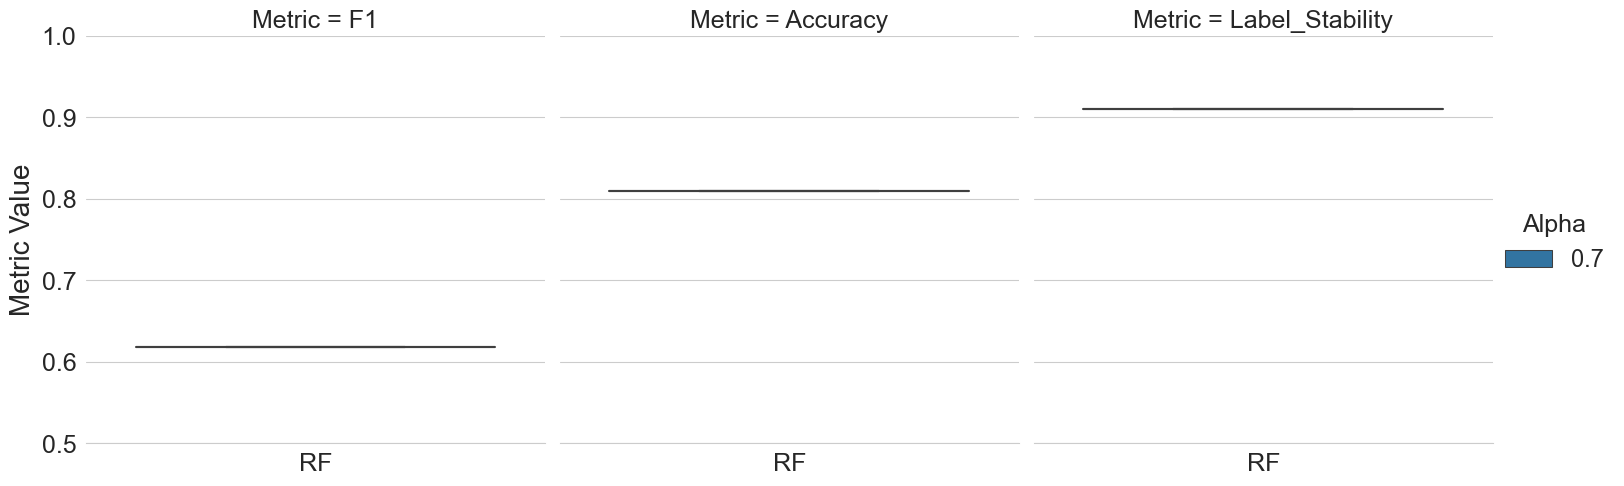

In [16]:
create_group_base_and_fair_models_box_plot(melted_all_subgroup_metrics_per_model_dct,
                                           ylim=(0.5, 1.0),
                                           metric_names=['F1', 'Accuracy', 'Label_Stability'],
                                           vals_to_replace=vals_to_replace)

<Figure size 1200x600 with 0 Axes>

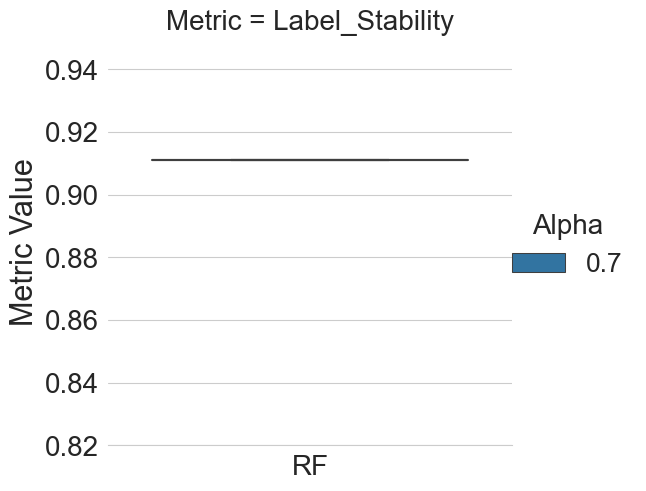

In [17]:
create_group_base_and_fair_models_box_plot(melted_all_subgroup_metrics_per_model_dct,
                                           ylim=(0.82, 0.95),
                                           metric_names=['Label_Stability'],
                                           vals_to_replace=vals_to_replace)

## Figure 2. Create group boxplots.

<Figure size 1200x600 with 0 Axes>

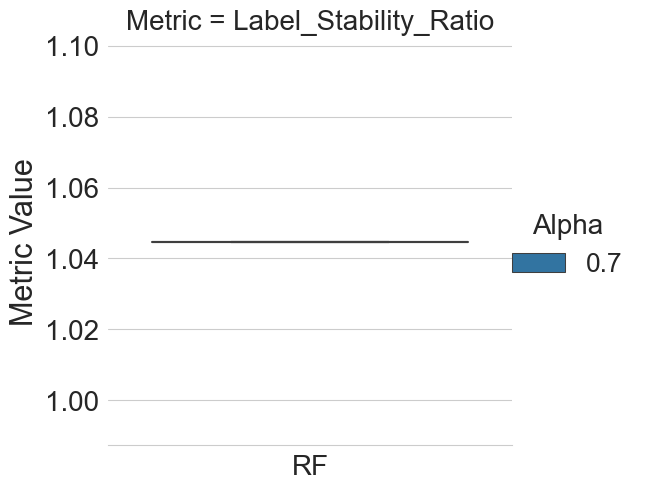

In [18]:
create_group_base_and_fair_models_box_plot(melted_all_group_metrics_per_model_dct,
                                           group='SEX&RAC1P',
                                           metric_names=['Label_Stability_Ratio'],
                                           vals_to_replace=vals_to_replace)

<Figure size 1200x600 with 0 Axes>

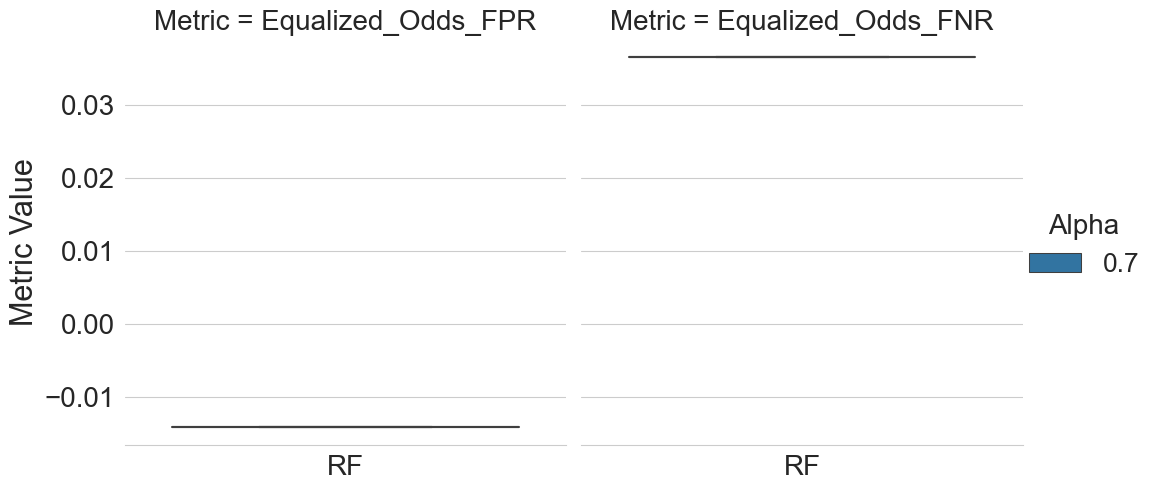

In [19]:
create_group_base_and_fair_models_box_plot(melted_all_group_metrics_per_model_dct,
                                           group='RAC1P',
                                           metric_names=['Equalized_Odds_FPR', 'Equalized_Odds_FNR'],
                                           vals_to_replace=vals_to_replace)

## Figure 5. Out-of-domain boxplots.

In [20]:
new_vals_to_replace = vals_to_replace
new_vals_to_replace['Test_Set_Index'] = {
    0: 'Poor set',
    1: 'Rich set',
}

<Figure size 1200x600 with 0 Axes>

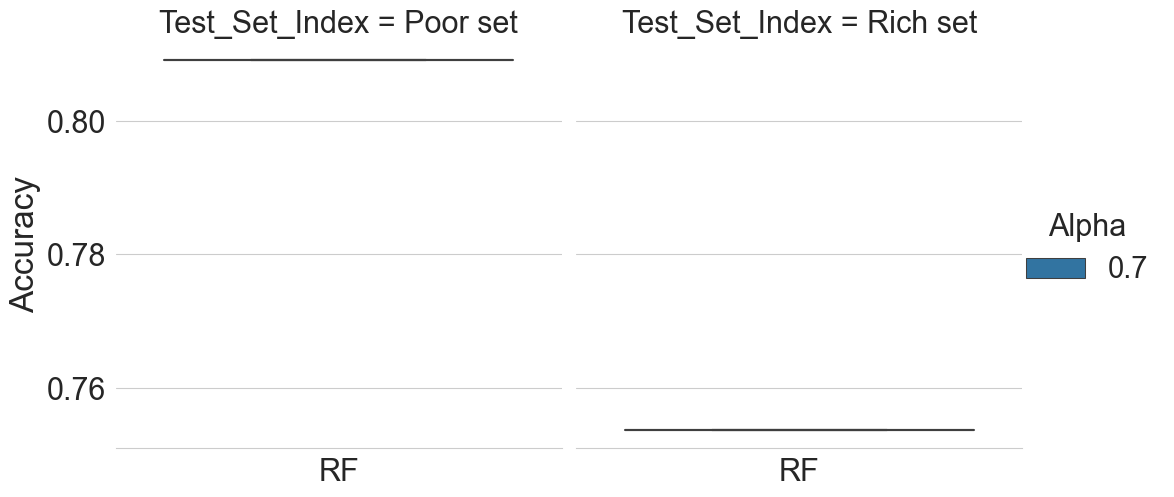

In [21]:
create_group_models_box_plot_per_test_set(melted_all_subgroup_metrics_per_model_dct, metric_name='Accuracy',
                                          vals_to_replace=new_vals_to_replace)

<Figure size 1200x600 with 0 Axes>

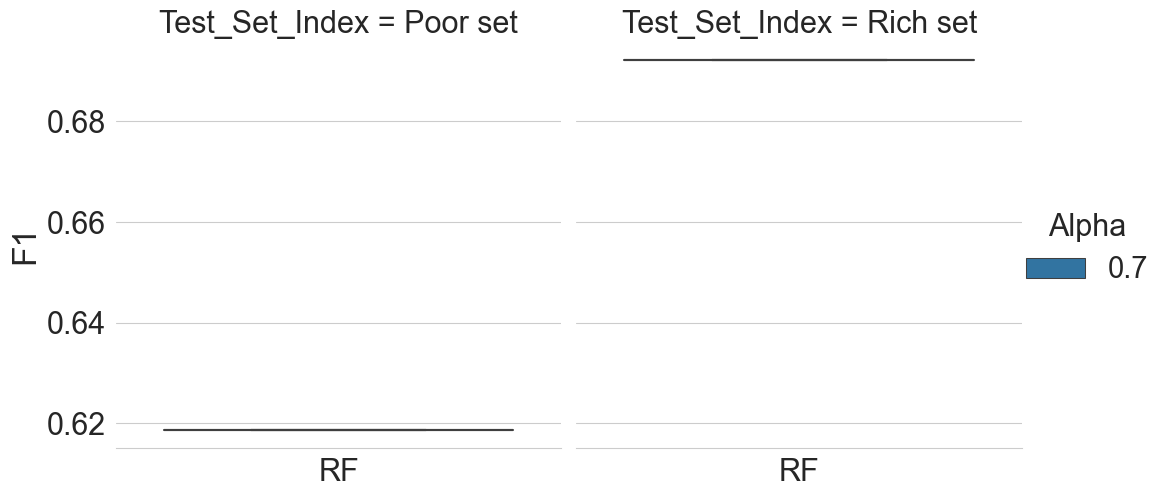

In [22]:
create_group_models_box_plot_per_test_set(melted_all_subgroup_metrics_per_model_dct, metric_name='F1',
                                          vals_to_replace=new_vals_to_replace)

<Figure size 1200x600 with 0 Axes>

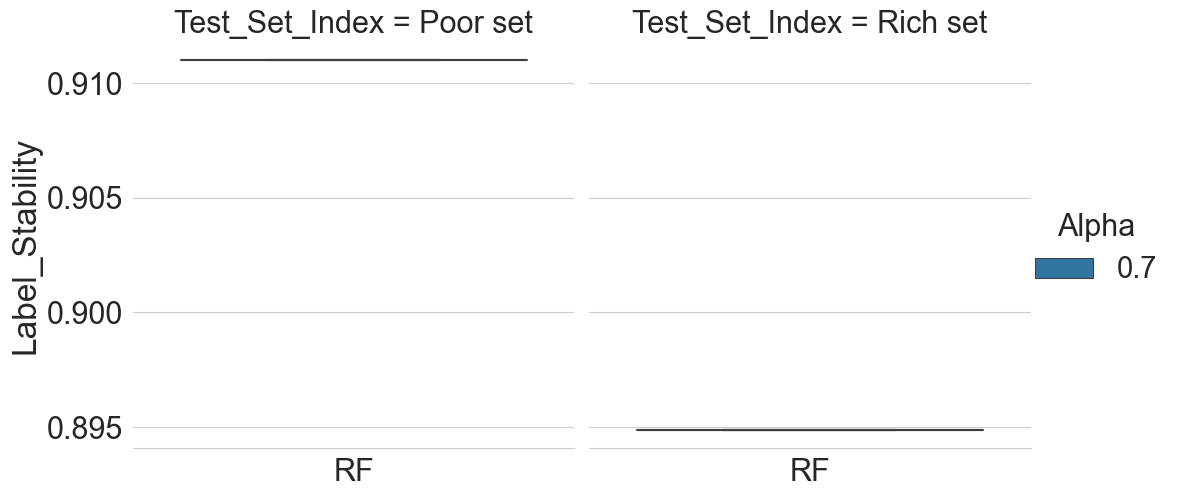

In [23]:
create_group_models_box_plot_per_test_set(melted_all_subgroup_metrics_per_model_dct, metric_name='Label_Stability',
                                          vals_to_replace=new_vals_to_replace)

<Figure size 1200x600 with 0 Axes>

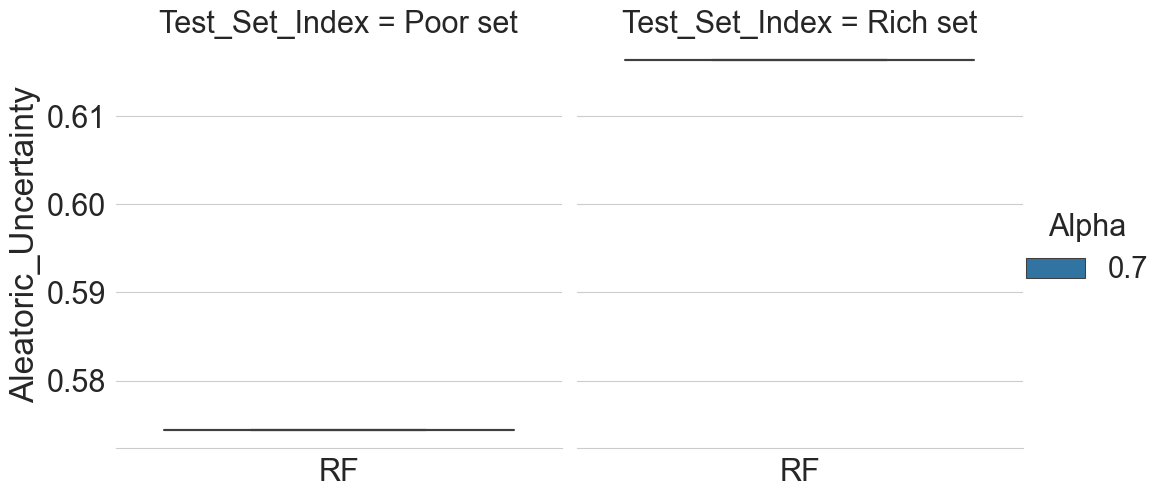

In [24]:
create_group_models_box_plot_per_test_set(melted_all_subgroup_metrics_per_model_dct, metric_name='Aleatoric_Uncertainty',
                                          vals_to_replace=new_vals_to_replace)

<Figure size 1200x600 with 0 Axes>

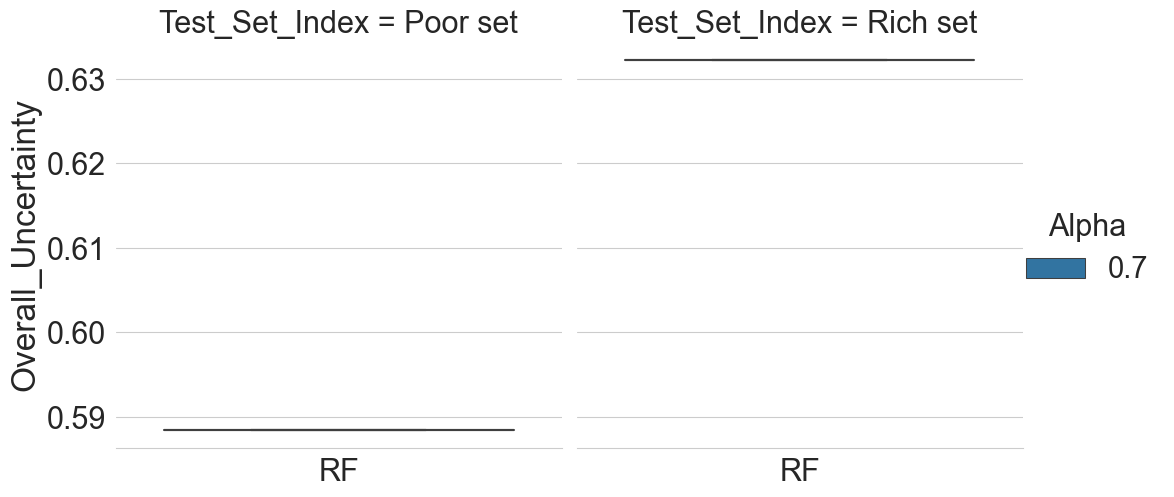

In [25]:
create_group_models_box_plot_per_test_set(melted_all_subgroup_metrics_per_model_dct, metric_name='Overall_Uncertainty',
                                          vals_to_replace=new_vals_to_replace)

<Figure size 1200x600 with 0 Axes>

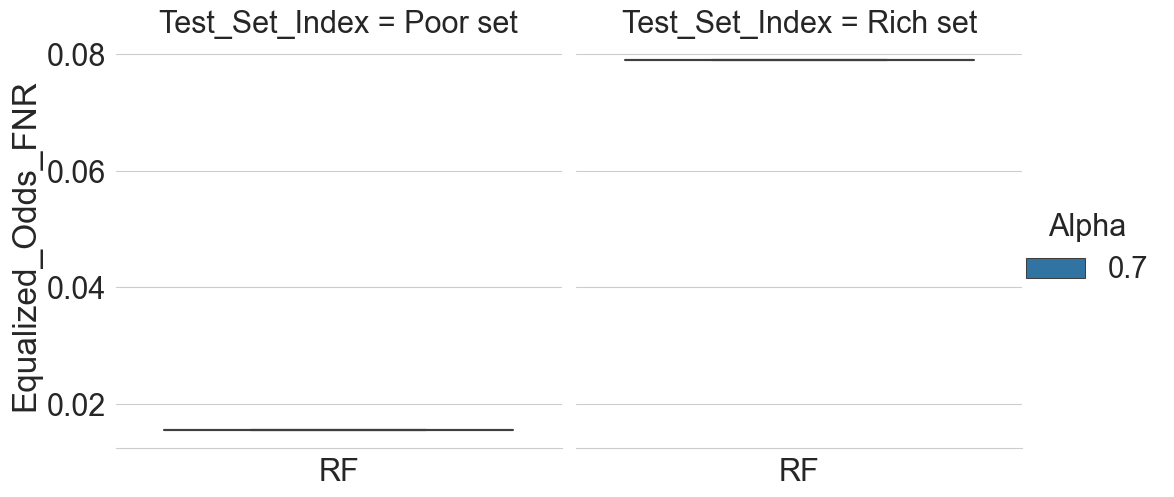

In [26]:
create_group_models_box_plot_per_test_set(melted_all_group_metrics_per_model_dct, metric_name='Equalized_Odds_FNR', group='SEX',
                                          vals_to_replace=new_vals_to_replace)

<Figure size 1200x600 with 0 Axes>

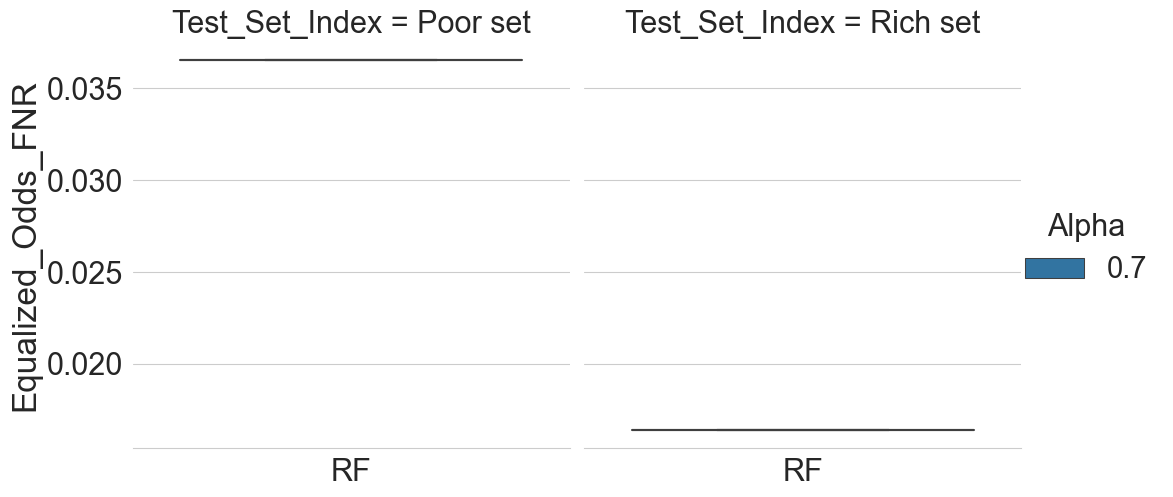

In [27]:
create_group_models_box_plot_per_test_set(melted_all_group_metrics_per_model_dct, metric_name='Equalized_Odds_FNR', group='RAC1P',
                                          vals_to_replace=new_vals_to_replace)

<Figure size 1200x600 with 0 Axes>

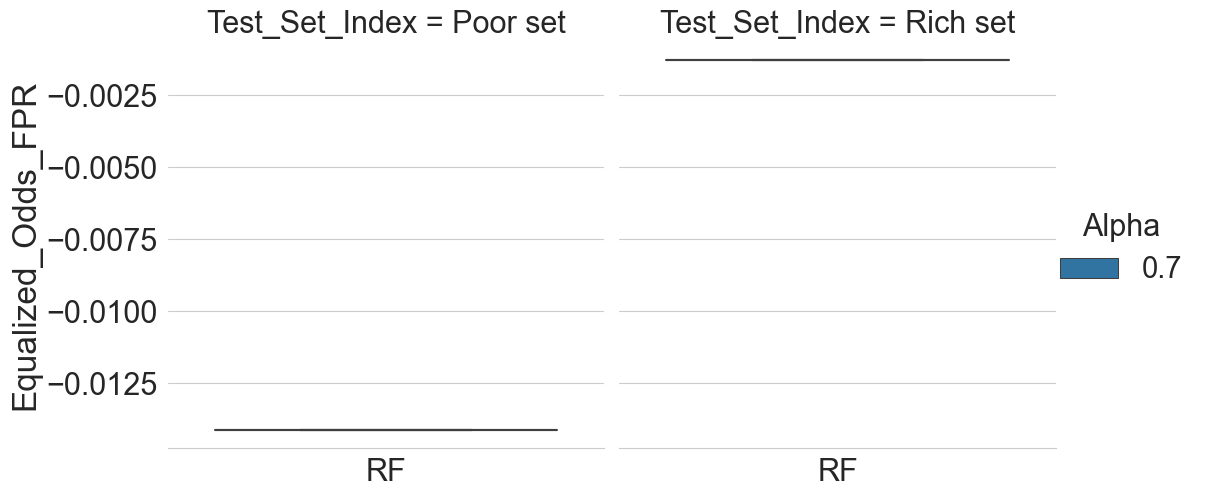

In [28]:
create_group_models_box_plot_per_test_set(melted_all_group_metrics_per_model_dct, metric_name='Equalized_Odds_FPR', group='RAC1P',
                                          vals_to_replace=new_vals_to_replace)

<Figure size 1200x600 with 0 Axes>

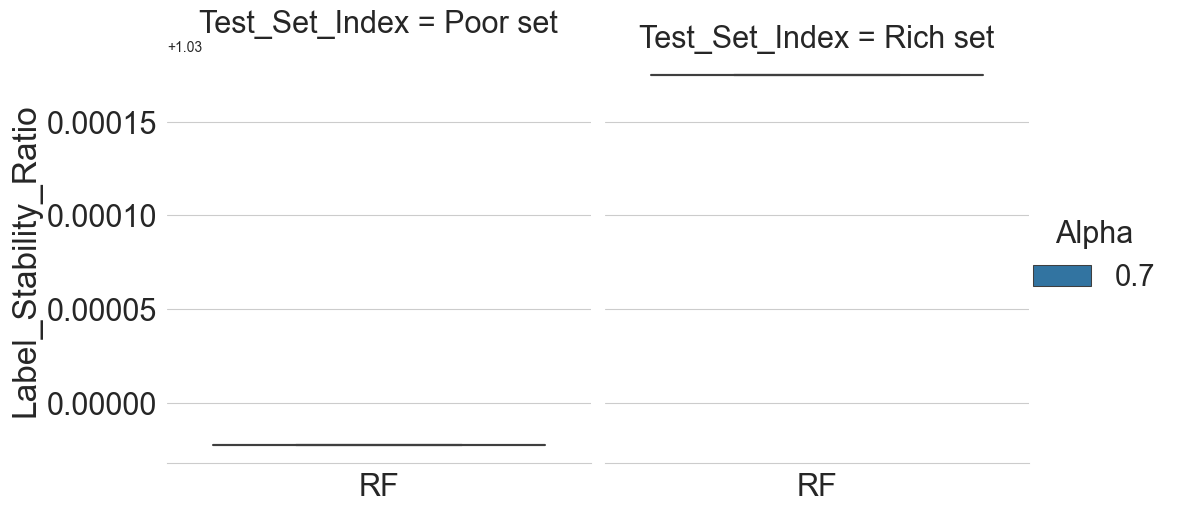

In [29]:
create_group_models_box_plot_per_test_set(melted_all_group_metrics_per_model_dct, metric_name='Label_Stability_Ratio', group='RAC1P',
                                          vals_to_replace=new_vals_to_replace)